# Clustering multimodal data with sincei

In [1]:
import os
import numpy as np
import pandas as pd

import anndata as ad
import mudata as md
import scanpy as sc

from sincei.multimodalClustering import (
    multiModal_clustering,
    umap_aligned
)

%matplotlib inline

In [2]:
os.chdir('/hpc/uu_bhardwaj/group/fsanchogomez/programs/sincei_tutorial_data/10x_multiome_testdata')

## Load AnnData

In [3]:
rna_path = 'sincei_output/rna/Counts_rna_genes_filtered.merged.h5ad'
rna_adata = ad.read_h5ad(rna_path)
rna_adata

AnnData object with n_obs × n_vars = 10208 × 48059
    obs: 'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
    var: 'chrom', 'end', 'start', 'var_names'

In [4]:
atac_path = 'sincei_output/atac/Counts_atac_peaks_filtered.merged.h5ad'
atac_adata = ad.read_h5ad(atac_path)
atac_adata

AnnData object with n_obs × n_vars = 12262 × 13249
    obs: 'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
    var: 'chrom', 'end', 'start', 'var_names'

## Making a mudata object

In [5]:
rna_adata.obs_names = rna_adata.obs['sample'].str.replace('rna_', '') + '::' +  rna_adata.obs['barcodes'].astype(str)
rna_adata.obs.head()

,barcodes,gini_coefficient,log1p_n_genes_by_counts,log1p_total_counts,n_genes_by_counts,obs_names,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_counts_in_top_50_genes,sample,total_counts
rep1::AAACAGCCACCTGTAA-1,AAACAGCCACCTGTAA-1,0.534111,8.883502,10.482289,7211,rep1_rna_rep1::AAACAGCCACCTGTAA-1,12.988760,19.752221,33.895787,7.584718,rna_rep1,35677.0
rep1::AAACAGCCACTGACCG-1,AAACAGCCACTGACCG-1,0.514948,9.545884,11.214789,13986,rep1_rna_rep1::AAACAGCCACTGACCG-1,8.062625,12.352632,21.431170,5.122677,rna_rep1,74219.0
rep1::AAACAGCCATAATCAC-1,AAACAGCCATAATCAC-1,0.525134,9.369393,11.020234,11723,rep1_rna_rep1::AAACAGCCATAATCAC-1,9.411264,14.724127,25.826145,6.059217,rna_rep1,61097.0
rep1::AAACATGCAAATTCGT-1,AAACATGCAAATTCGT-1,0.495684,9.290814,10.790411,10837,rep1_rna_rep1::AAACATGCAAATTCGT-1,8.710249,13.369171,23.455264,5.758774,rna_rep1,48552.0
rep1::AAACATGCATATAACC-1,AAACATGCATATAACC-1,0.510008,9.513551,11.165465,13541,rep1_rna_rep1::AAACATGCATATAACC-1,8.357043,12.638895,21.948561,5.550130,rna_rep1,70647.0


In [6]:
atac_adata.obs_names = atac_adata.obs['sample'].str.replace('atac_', '') + '::' +  atac_adata.obs['barcodes'].astype(str)
atac_adata.obs.head()

,barcodes,gini_coefficient,log1p_n_genes_by_counts,log1p_total_counts,n_genes_by_counts,obs_names,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_counts_in_top_50_genes,sample,total_counts
rep1::AAACAGCCACCTGTAA-1,AAACAGCCACCTGTAA-1,0.301175,6.431331,7.029088,620,rep1_atac_rep1::AAACAGCCACCTGTAA-1,34.308511,54.787234,89.361702,21.010638,atac_rep1,1128.0
rep1::AAACAGCCACTCGCTC-1,AAACAGCCACTCGCTC-1,0.273907,7.122060,7.607878,1238,rep1_atac_rep1::AAACAGCCACTCGCTC-1,20.466965,33.929459,63.338301,12.071535,atac_rep1,2013.0
rep1::AAACAGCCACTGACCG-1,AAACAGCCACTGACCG-1,0.275777,7.184629,7.672293,1318,rep1_atac_rep1::AAACAGCCACTGACCG-1,19.515603,33.022823,60.968794,11.783884,atac_rep1,2147.0
rep1::AAACAGCCATAATCAC-1,AAACAGCCATAATCAC-1,0.277349,6.855409,7.328437,948,rep1_atac_rep1::AAACAGCCATAATCAC-1,25.755585,40.932983,70.565046,15.505913,atac_rep1,1522.0
rep1::AAACATGCAAATTCGT-1,AAACATGCAAATTCGT-1,0.293119,7.175490,7.712891,1306,rep1_atac_rep1::AAACATGCAAATTCGT-1,20.617174,34.033989,61.851521,12.119857,atac_rep1,2236.0


In [7]:
common_bc = [bc for bc in rna_adata.obs_names.tolist() if bc in atac_adata.obs_names.tolist()]
len(common_bc)

9027

In [8]:
rna_adata = rna_adata[rna_adata.obs_names.isin(common_bc)]
rna_adata

View of AnnData object with n_obs × n_vars = 9027 × 48059
    obs: 'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
    var: 'chrom', 'end', 'start', 'var_names'

In [9]:
atac_adata = atac_adata[atac_adata.obs_names.isin(common_bc), :]
atac_adata

View of AnnData object with n_obs × n_vars = 9027 × 13249
    obs: 'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
    var: 'chrom', 'end', 'start', 'var_names'

In [10]:
mdata = md.MuData({'rna': rna_adata,
                         'atac': atac_adata})
mdata

/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:963: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behavio

MuData object with n_obs × n_vars = 9027 × 61308
  2 modalities
    rna:	9027 x 48059
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
      var:	'chrom', 'end', 'start', 'var_names'
    atac:	9027 x 13249
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
      var:	'chrom', 'end', 'start', 'var_names'

In [11]:
mdata = mdata[~mdata.obs.isna().any(axis=1), :]
mdata.obs

,rna:barcodes,rna:gini_coefficient,rna:log1p_n_genes_by_counts,rna:log1p_total_counts,rna:n_genes_by_counts,rna:obs_names,rna:pct_counts_in_top_100_genes,rna:pct_counts_in_top_200_genes,rna:pct_counts_in_top_500_genes,rna:pct_counts_in_top_50_genes,...,atac:log1p_n_genes_by_counts,atac:log1p_total_counts,atac:n_genes_by_counts,atac:obs_names,atac:pct_counts_in_top_100_genes,atac:pct_counts_in_top_200_genes,atac:pct_counts_in_top_500_genes,atac:pct_counts_in_top_50_genes,atac:sample,atac:total_counts
rep1::AAACAGCCACCTGTAA-1,AAACAGCCACCTGTAA-1,0.534111,8.883502,10.482289,7211,rep1_rna_rep1::AAACAGCCACCTGTAA-1,12.988760,19.752221,33.895787,7.584718,...,6.431331,7.029088,620,rep1_atac_rep1::AAACAGCCACCTGTAA-1,34.308511,54.787234,89.361702,21.010638,atac_rep1,1128.0
rep1::AAACAGCCACTGACCG-1,AAACAGCCACTGACCG-1,0.514948,9.545884,11.214789,13986,rep1_rna_rep1::AAACAGCCACTGACCG-1,8.062625,12.352632,21.431170,5.122677,...,7.184629,7.672293,1318,rep1_atac_rep1::AAACAGCCACTGACCG-1,19.515603,33.022823,60.968794,11.783884,atac_rep1,2147.0
rep1::AAACAGCCATAATCAC-1,AAACAGCCATAATCAC-1,0.525134,9.369393,11.020234,11723,rep1_rna_rep1::AAACAGCCATAATCAC-1,9.411264,14.724127,25.826145,6.059217,...,6.855409,7.328437,948,rep1_atac_rep1::AAACAGCCATAATCAC-1,25.755585,40.932983,70.565046,15.505913,atac_rep1,1522.0
rep1::AAACATGCAAATTCGT-1,AAACATGCAAATTCGT-1,0.495684,9.290814,10.790411,10837,rep1_rna_rep1::AAACATGCAAATTCGT-1,8.710249,13.369171,23.455264,5.758774,...,7.175490,7.712891,1306,rep1_atac_rep1::AAACATGCAAATTCGT-1,20.617174,34.033989,61.851521,12.119857,atac_rep1,2236.0
rep1::AAACATGCATATAACC-1,AAACATGCATATAACC-1,0.510008,9.513551,11.165465,13541,rep1_rna_rep1::AAACATGCATATAACC-1,8.357043,12.638895,21.948561,5.550130,...,7.284135,7.836370,1456,rep1_atac_rep1::AAACATGCATATAACC-1,19.367589,31.936759,58.142292,11.343874,atac_rep1,2530.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rep2::TTTGTGAAGGAAGCAC-1,TTTGTGAAGGAAGCAC-1,0.477961,9.211140,10.787131,10007,rep2_rna_rep2::TTTGTGAAGGAAGCAC-1,9.389788,14.698407,24.456016,6.286033,...,6.844815,7.337588,938,rep2_atac_rep2::TTTGTGAAGGAAGCAC-1,25.781250,41.861979,71.484375,15.885417,atac_rep2,1536.0
rep2::TTTGTGAAGTAACCAC-1,TTTGTGAAGTAACCAC-1,0.528502,9.385637,11.086472,11915,rep2_rna_rep2::TTTGTGAAGTAACCAC-1,9.200227,14.019393,24.883197,5.974173,...,7.324490,7.908755,1516,rep2_atac_rep2::TTTGTGAAGTAACCAC-1,18.088235,29.963235,55.477941,10.551471,atac_rep2,2720.0
rep2::TTTGTGAAGTTGGGCC-1,TTTGTGAAGTTGGGCC-1,0.497997,8.876545,10.416940,7161,rep2_rna_rep2::TTTGTGAAGTTGGGCC-1,11.819270,17.875524,30.960503,7.890485,...,7.083388,7.737180,1191,rep2_atac_rep2::TTTGTGAAGTTGGGCC-1,23.439546,38.061982,67.263204,14.273243,atac_rep2,2291.0
rep2::TTTGTGTTCGTCAAGT-1,TTTGTGTTCGTCAAGT-1,0.543668,9.297893,11.004297,10914,rep2_rna_rep2::TTTGTGTTCGTCAAGT-1,12.484409,18.391512,29.109777,8.399993,...,6.960348,7.566311,1053,rep2_atac_rep2::TTTGTGTTCGTCAAGT-1,25.116520,40.756085,71.361989,14.759192,atac_rep2,1931.0


In [12]:
mdata_path = 'sincei_output/10x_multiome.h5mu'
mdata.write_h5mu(mdata_path)

/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:963: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1264: ImplicitModificationWarning: Setting element `.varm['rna']` of view, initializing view as actual.
  attrm[mod] = mapping > 0
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sin

## Load data

In [13]:
multi_modal_path = 'sincei_output/10x_multiome.h5mu'
mdata = md.read_h5mu(multi_modal_path)
mdata

/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:963: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behavio

MuData object with n_obs × n_vars = 9027 × 61308
  2 modalities
    rna:	9027 x 48059
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
      var:	'chrom', 'end', 'start', 'var_names'
    atac:	9027 x 13249
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
      var:	'chrom', 'end', 'start', 'var_names'

## Load metadata and add celltype

In [14]:
rna_metadata = pd.read_csv('/hpc/uu_bhardwaj/group/fsanchogomez/programs/sincei_tutorial_data/10x_multiome_testdata/metadata_cd34_rna.csv', header=0, index_col=0)
rna_metadata.index = rna_metadata.index.str.replace('rna_', '')

In [15]:
atac_metadata = pd.read_csv('/hpc/uu_bhardwaj/group/fsanchogomez/programs/sincei_tutorial_data/10x_multiome_testdata/metadata_cd34_atac.csv', header=0, index_col=0)
atac_metadata.index = atac_metadata.index.str.replace('atac_', '')

In [16]:
mdata

MuData object with n_obs × n_vars = 9027 × 61308
  2 modalities
    rna:	9027 x 48059
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
      var:	'chrom', 'end', 'start', 'var_names'
    atac:	9027 x 13249
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
      var:	'chrom', 'end', 'start', 'var_names'

In [17]:
mdata.obs = mdata['rna'].obs.merge(rna_metadata['celltype'], left_index=True, right_index=True, how='left')
mdata

MuData object with n_obs × n_vars = 9027 × 61308
  obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts', 'celltype'
  2 modalities
    rna:	9027 x 48059
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
      var:	'chrom', 'end', 'start', 'var_names'
    atac:	9027 x 13249
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
      var:	'chrom', 'end', 'start', 'var_names'

In [18]:
mdata = mdata[~mdata.obs['celltype'].isna()]
mdata

View of MuData object with n_obs × n_vars = 4262 × 61308
  obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts', 'celltype'
  2 modalities
    rna:	4262 x 48059
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
      var:	'chrom', 'end', 'start', 'var_names'
    atac:	4262 x 13249
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
      var:	'chrom', 'end', 'start', 'var_names'

In [19]:
# Set a seed if you want reproducibility
rng = np.random.default_rng(42)

celltypes = mdata.obs["celltype"].unique()

keep_indices = []
for ct in celltypes:
    # all cells of that type
    idx = mdata.obs.index[mdata.obs["celltype"] == ct]
    
    # sample
    n_keep = max(1, int(len(idx) * 0.5))
    sampled = rng.choice(idx, size=n_keep, replace=False)
    
    keep_indices.extend(sampled)

# Make new MuData with only the selected cells
mdata_sub = mdata[keep_indices, :].copy()
mdata_sub

/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:963: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behavio

MuData object with n_obs × n_vars = 2130 × 61308
  obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts', 'celltype'
  2 modalities
    rna:	2130 x 48059
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
      var:	'chrom', 'end', 'start', 'var_names'
    atac:	2130 x 13249
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
      var:	'chrom', 'end', 'start', 'var_names'

In [20]:
mdata_sub.write('sincei_output/10x_multiome_filtered.h5mu')

... storing 'celltype' as categorical
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


## Clustering

In [12]:
multi_modal_path = 'sincei_output/10x_multiome_filtered.h5mu'
mdata = md.read_h5mu(multi_modal_path)
mdata

/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:963: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behavio

MuData object with n_obs × n_vars = 2130 × 61308
  obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts', 'celltype'
  2 modalities
    rna:	2130 x 48059
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
      var:	'chrom', 'end', 'start', 'var_names'
    atac:	2130 x 13249
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts'
      var:	'chrom', 'end', 'start', 'var_names'

In [4]:
multiModal_clustering(
    mdata=mdata,
    modalities=['rna', 'atac'],
    method=['glmPCA', 'LSA'],
    modal_weights=[1, 1],
    nK=30,
    nPrinComps=[20, 30],
    clusterResolution=[0.8, 1.0],
    binarize=False,
    glmPCAfamily='poisson',
)
mdata.write_h5mu('sincei_output/10x_multiome_clustered.h5mu')

LEARNING RATE: 0.2


  0%|                                                                                                                                         | 0/100 [00:00<?, ?it/s]/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mctorch/nn/manifolds/stiefel.py:72: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:2496.)
  q, r = torch.qr(X + G)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [10:15<00:00,  6.15s/it]
/hpc/uu_bhardwaj/group/fsanchogomez/programs/src/sincei/sincei/GLMPCA.py:194: UserWarning: Converting a tensor with requires_gr


Coherence Score:  -2.248670911312365


/hpc/uu_bhardwaj/group/fsanchogomez/programs/src/sincei/sincei/multimodalClustering.py:150: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = model_object.get_cell_topic()
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/umap/umap_.py:1401: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


Detected clusters:  {0, 1, 2, 3, 4, 5, 6}


/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [ ]:
def multi_leiden(
    mdata,
    clusterResolution,
    modal_weights,
    nK=30,
):
    import leidenalg as la
    from scanpy._utils import get_igraph_from_adjacency

    modalities = list(mdata.mod.keys())

    adatas = []
    graphs = []

    for i, mod in enumerate(modalities):
        adata = mdata.mod[mod]

        # get graph
        graph = get_igraph_from_adjacency(adata.obsp["connectivities"], directed=True)

        adatas.append(adata)
        graphs.append(graph)

    # leiden multi-layer clustering
    optimiser = la.Optimiser()

    parts = [
        la.RBConfigurationVertexPartition(
            graph,
            resolution_parameter=clusterResolution[i],
        )
        for i, graph in enumerate(graphs)
    ]

    optimiser.optimise_partition_multiplex(parts, layer_weights=modal_weights)
    print("Detected clusters: ", set(parts[0].membership))
    groups = np.array(parts[0].membership)
    mdata.obs["cluster_multi"] = pd.Categorical(values=groups.astype("U"))

    for mod, adata in zip(modalities, adatas):
        mdata.mod[mod] = adata

In [16]:
multi_modal_path = 'sincei_output/10x_multiome_clustered.h5mu'
mdata = md.read_h5mu(multi_modal_path)
mdata

/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:963: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behavio

MuData object with n_obs × n_vars = 2130 × 61308
  obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts', 'celltype', 'cluster_multi'
  2 modalities
    rna:	2130 x 48059
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts', 'leiden'
      var:	'chrom', 'end', 'start', 'var_names'
      uns:	'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
      obsm:	'X_pca', 'X_umap'
      obsp:	'connectivities', 'distances'
    atac:	2130 x 13249
      obs:	'barcodes', 'gini_coefficient', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'obs_names', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'sample', 'total_counts', 'leiden'
      var:	'chrom', 'end', 'start', 'var_names'
      uns:	'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
      obsm:	'X_pca', 'X_umap'
      obsp:	'connectivities', 'distances'

In [17]:
multi_leiden(
    mdata,
    clusterResolution=[1.0, 1.0],
    modal_weights=[1.0, 1.0],
    nK=30,
)

Detected clusters:  {0, 1, 2, 3, 4, 5, 6}


In [18]:
mdata['rna'].obs['celltype'] = mdata.obs['celltype']
mdata['atac'].obs['celltype'] = mdata.obs['celltype']

mdata['rna'].obs['cluster_multi'] = mdata.obs['cluster_multi']
mdata['atac'].obs['cluster_multi'] = mdata.obs['cluster_multi']

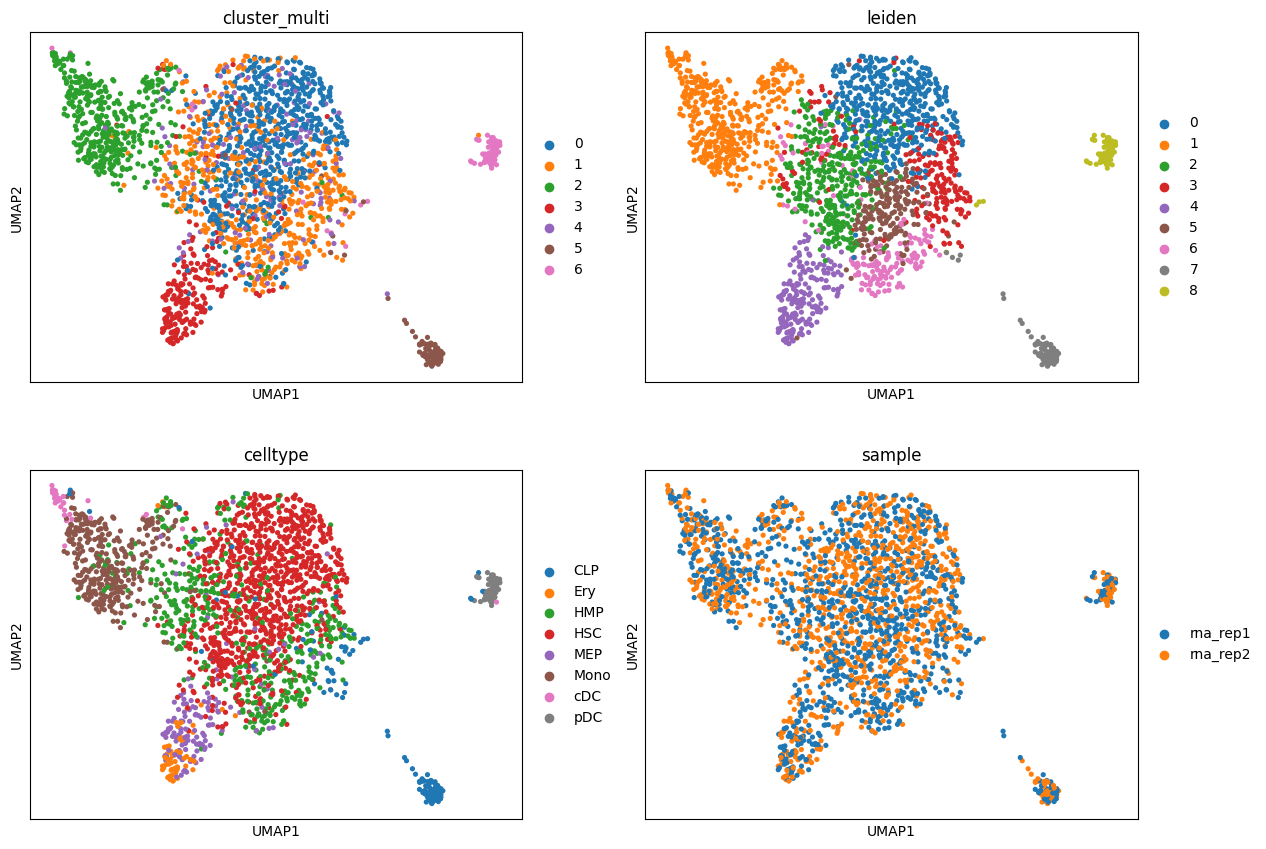

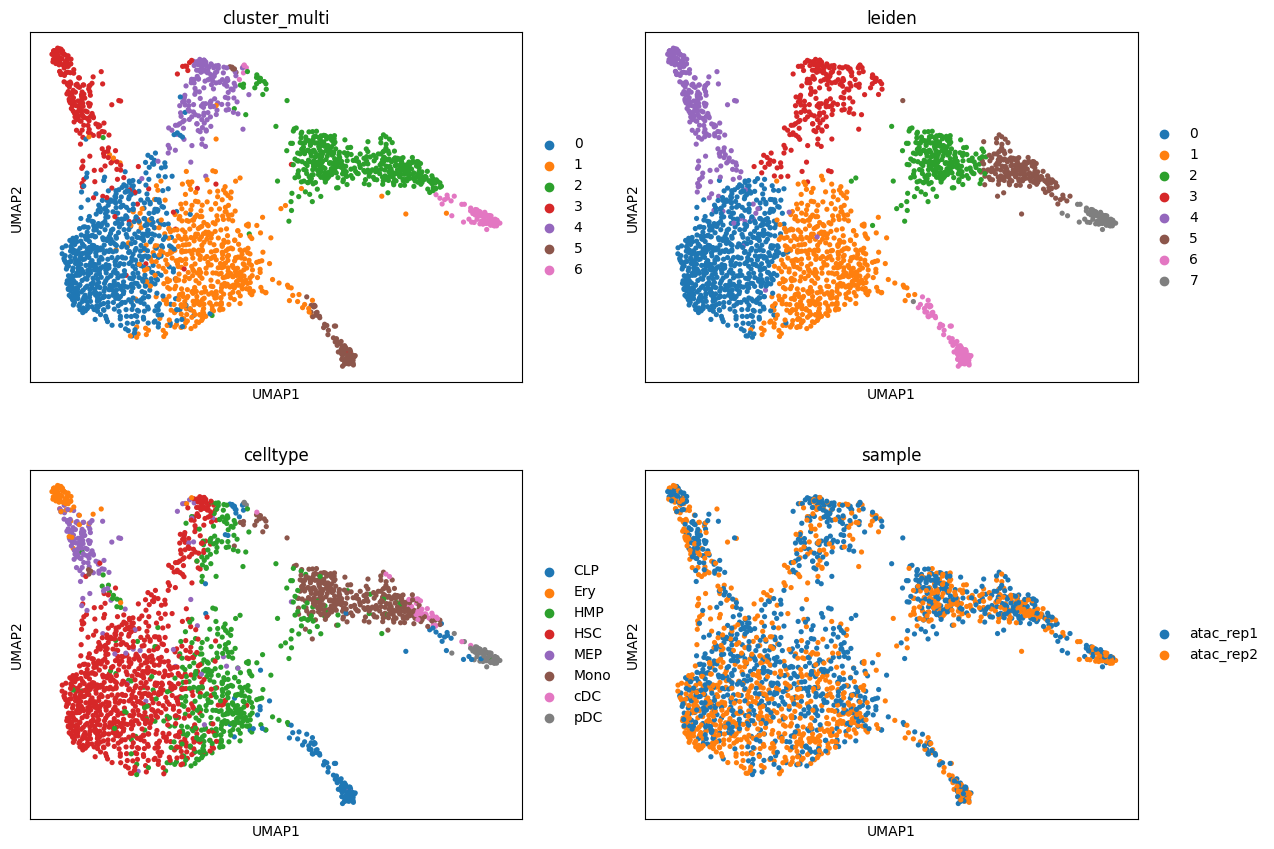

In [19]:
sc.pl.umap(mdata['rna'], color=['cluster_multi', 'leiden','celltype', 'sample'], ncols=2)
sc.pl.umap(mdata['atac'], color=['cluster_multi', 'leiden', 'celltype', 'sample'], ncols=2)

## Align UMAP

In [7]:
umap_aligned(
    mdata,
    modalities=['rna', 'atac'],
    nK=30,
    distance_metric="euclidean",
)

/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/umap/umap_.py:1401: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/umap/umap_.py:1401: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/hpc/uu_bhardwaj/group/fsanchogomez/miniforge3/envs/sincei_exp/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


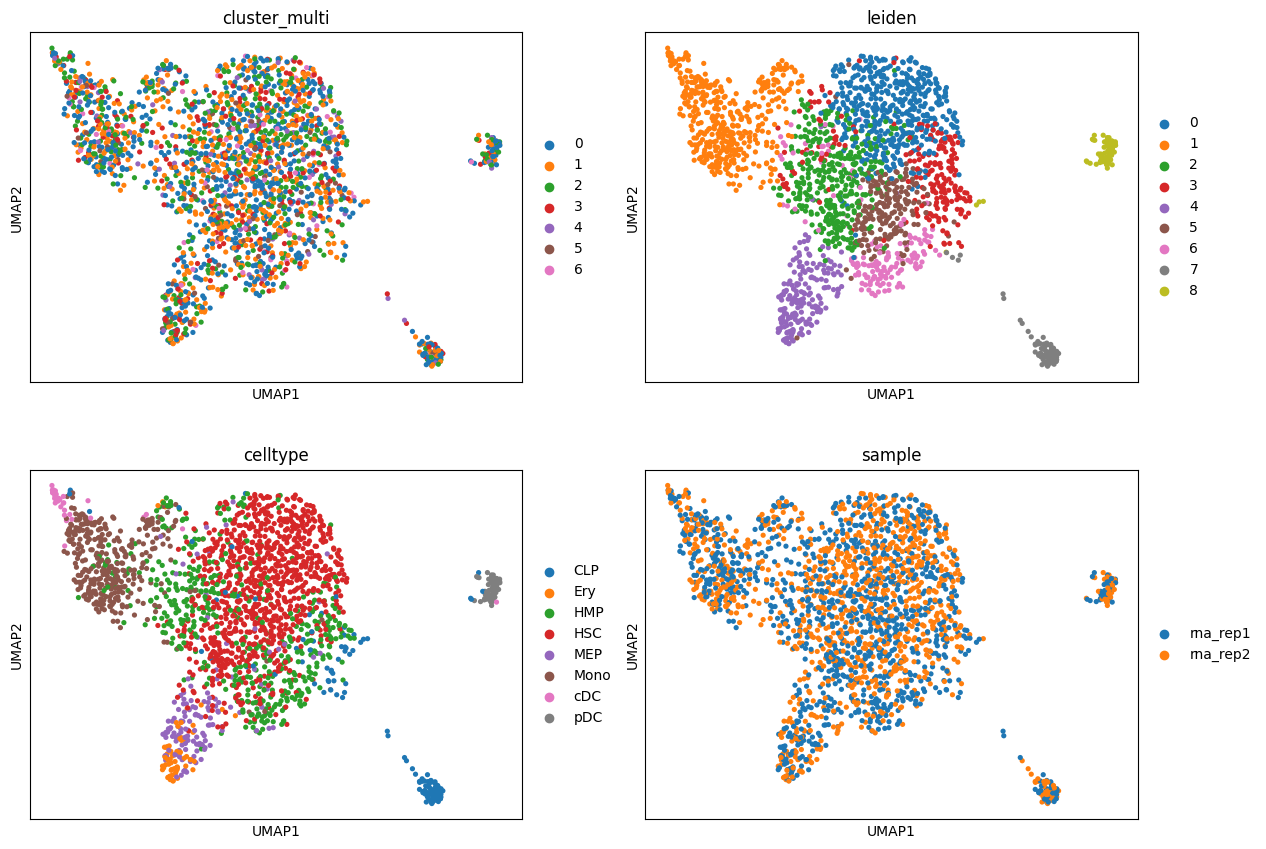

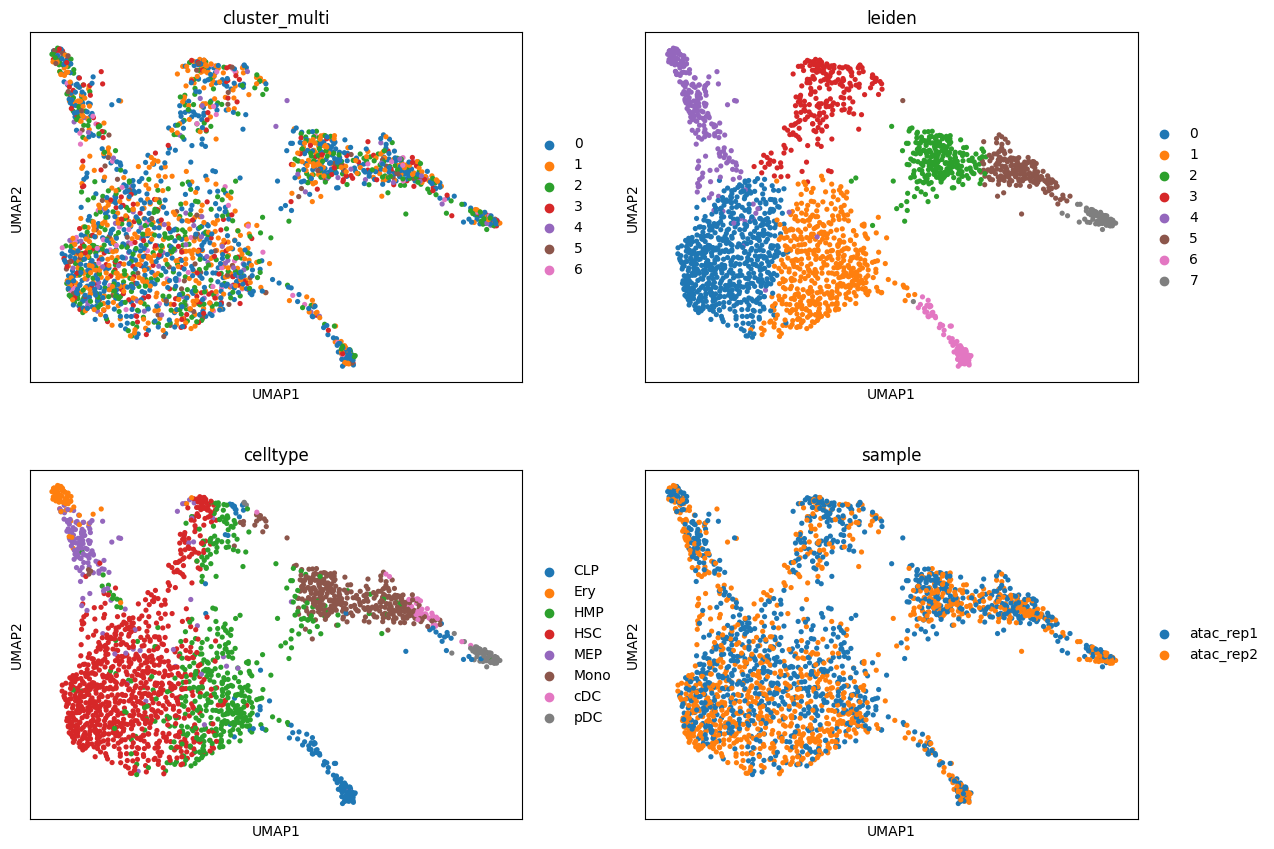

In [8]:
sc.pl.umap(mdata['rna'], color=['cluster_multi', 'leiden', 'celltype', 'sample'], ncols=2)
sc.pl.umap(mdata['atac'], color=['cluster_multi', 'leiden', 'celltype', 'sample'], ncols=2)